# Hotel Reviews EDA
[Dataset Link](https://www.kaggle.com/datasets/datafiniti/hotel-reviews?select=7282_1.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

## Data Loading

In [2]:
data = pd.read_csv("../Storage/Data/7282_1.csv")
print(f"Data Shape:{data.shape}\n")
data.sample(3)


Data Shape:(35912, 19)



,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
32860,88 E Nationwide Blvd,Hotels,Columbus,US,39.969219,-82.999881,Drury Inn and Suites Columbus Convention Center,43215,OH,2016-08-01T00:00:00Z,2016-11-03T22:46:53Z,NaN,NaN,1.0,Great until I was assaulted not only by other ...,Watch out for hobos,Medina,msfd1137,NY
25718,1379 Washington Ave,"Hotels,Hotel",Albany,US,42.686743,-73.815101,Towneplace Suites Albany University Area,12206,NY,2015-06-28T00:00:00Z,2016-12-15T19:38:59Z,NaN,NaN,2.0,We were here for two days for a soccer tournam...,Disappointing but not terrible,Scarborough,mmmguinness,VT
13447,6560 Loisdale Ct,Hotels,Springfield,US,38.775600,-77.178510,Comfort Inn - Springfield,22150,VA,2016-06-26T00:00:00Z,2016-10-30T18:48:08Z,NaN,NaN,3.0,It's a fairly basic place to stay. My family s...,Somewhere to stay,NaN,S,NaN


## Data Cleaning

In [3]:
hotels = data[data["categories"] == "Hotels"]
print(f"Data Filtered By Category Shape:{hotels.shape}")
hotels.sample(1)

Data Filtered By Category Shape:(21420, 19)


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
20226,4965 Montevallo Rd,Hotels,Birmingham,US,33.529422,-86.715389,Comfort Inn Birmingham - Irondale,35210,Jefferson Park,2015-02-24T00:00:00Z,2016-11-21T23:32:25Z,NaN,NaN,3.0,not your typical Comfort Inn. It was Ok for a ...,not your typical Comfort Inn,Little Rock,Jeff,AR


In [4]:
hotels.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [5]:
# check columns that have missing values
hotels.isna().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   34
longitude                  34
name                        0
postalCode                 55
province                    0
reviews.date               25
reviews.dateAdded           0
reviews.doRecommend     21420
reviews.id              21420
reviews.rating             50
reviews.text               16
reviews.title             191
reviews.userCity        13967
reviews.username           25
reviews.userProvince    13537
dtype: int64

In [6]:
# Needed columns that contains reviews values
columns_to_use = [
    'name', 'reviews.text', 'reviews.title'
]

In [7]:
hotels[columns_to_use].isna().sum()

name               0
reviews.text      16
reviews.title    191
dtype: int64

We notice that there are many useless columns for `Sentiment Analysis` task, So we are going to drop them and drop the rows that contains `NaN` values for needed columns (`reviews.text` \& `reviews.title`), which will be negligible (191) in compare with the rest of the data (21420) and don't make a big difference.

In [8]:
# remove any columns out of `columns_to_use` list
# then drop all rows with missing values
reviews = hotels[columns_to_use].dropna()
print(f"Reviews Data Shape:{reviews.shape}")
reviews.sample(1)


Reviews Data Shape:(21227, 3)


,name,reviews.text,reviews.title
13491,Comfort Inn - Springfield,Polished as your shoes. Distinctive as your su...,Excellent.


## Exploratory Data Analysis

In [9]:
hotels['reviews.rating'].dropna().describe()
# hotels[hotels['reviews.rating'] == 10].sample(1)

count    21370.000000
mean         3.664483
std          1.351322
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: reviews.rating, dtype: float64

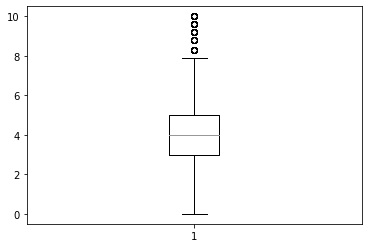

In [10]:
plt.boxplot(hotels['reviews.rating'].dropna())
plt.show()

In [11]:
# combine review.title and review.text, hopfully to add more expressive words
reviews['full_review'] = reviews['reviews.title'] + " | " + reviews['reviews.text']
print(reviews['full_review'].sample(3, random_state=1).values)

['Never Again in This Lifetime | They overbook then lie about it and then have no rooms available at the time they tell you to come back for your room. Horrible experience with this property, will never book with La Quinta again, anywhere.'
 'will consider | The hotel is excellent and clean, I will consider it next time'
 'Loved this place! | The hotel lives up to the pictures. The breakfast was excellent. I especially liked that the front desk staff arranged for my train tickets for me. It is very convenient to the train station too.']


In [12]:
# all chars to lower case
reviews['cleaned'] = reviews['full_review'].apply(lambda review: review.lower())
print(reviews['cleaned'].sample(3, random_state=1).values)


['never again in this lifetime | they overbook then lie about it and then have no rooms available at the time they tell you to come back for your room. horrible experience with this property, will never book with la quinta again, anywhere.'
 'will consider | the hotel is excellent and clean, i will consider it next time'
 'loved this place! | the hotel lives up to the pictures. the breakfast was excellent. i especially liked that the front desk staff arranged for my train tickets for me. it is very convenient to the train station too.']


In [13]:
# remove special chars
reviews['cleaned'] = reviews['cleaned'].map(lambda review: re.sub(r'\W+', ' ', review))
print(reviews['cleaned'].sample(3, random_state=1).values)

['never again in this lifetime they overbook then lie about it and then have no rooms available at the time they tell you to come back for your room horrible experience with this property will never book with la quinta again anywhere '
 'will consider the hotel is excellent and clean i will consider it next time'
 'loved this place the hotel lives up to the pictures the breakfast was excellent i especially liked that the front desk staff arranged for my train tickets for me it is very convenient to the train station too ']


In [14]:
# remove punctuations
reviews['cleaned'] = reviews['cleaned'].apply(lambda review: re.sub('[%s]' % re.escape(string.punctuation), '', review))
print(reviews['cleaned'].sample(3, random_state=1).values)


['never again in this lifetime they overbook then lie about it and then have no rooms available at the time they tell you to come back for your room horrible experience with this property will never book with la quinta again anywhere '
 'will consider the hotel is excellent and clean i will consider it next time'
 'loved this place the hotel lives up to the pictures the breakfast was excellent i especially liked that the front desk staff arranged for my train tickets for me it is very convenient to the train station too ']


In [15]:
# remove Non-English words

import nltk
words = set(nltk.corpus.words.words())
reviews['cleaned'] = reviews['cleaned'].apply(lambda review: " ".join(w for w in nltk.wordpunct_tokenize(review) \
                                                                      if w.lower() in words or not w.isalpha()))
print(reviews['cleaned'].sample(3, random_state=1).values)

['never again in this lifetime they overbook then lie about it and then have no available at the time they tell you to come back for your room horrible experience with this property will never book with la again anywhere'
 'will consider the hotel is excellent and clean i will consider it next time'
 'this place the hotel up to the the breakfast was excellent i especially that the front desk staff for my train for me it is very convenient to the train station too']


In [49]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization with stopwords removal
reviews['lemmatized'] = reviews['cleaned'].apply(lambda review: ' '.join([token.lemma_ for token in list(nlp(review)) \
                                                                          if (token.is_stop==False and token.is_digit==False)]))
print(reviews['lemmatized'].sample(3, random_state=1).values)

['lifetime overbook lie available time tell come room horrible experience property book la'
 'consider hotel excellent clean consider time'
 'place hotel breakfast excellent especially desk staff train convenient train station']


In [50]:
# Removing extra spaces
reviews['lemmatized'] = reviews['lemmatized'].apply(lambda review: re.sub(' +',' ',review))
print(reviews['lemmatized'].sample(3, random_state=1).values)


['lifetime overbook lie available time tell come room horrible experience property book la'
 'consider hotel excellent clean consider time'
 'place hotel breakfast excellent especially desk staff train convenient train station']


In [70]:
# group all reviews by hotel name
reviews_grouped = reviews[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
reviews_grouped.head(3)

,lemmatized
name,
A Bed & Breakfast In Cambridge,host great breakfast good good thing stay host...
Acorn Motor Inn,comfy place stay sketchy man smoke parking lot...
Ambassadors Inn and Suites,time relax nice peaceful room use walk distanc...


In [71]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
tdm_sparse = cv.fit_transform(reviews_grouped['lemmatized'])
reviews_dtm = pd.DataFrame(tdm_sparse.toarray(), columns=cv.get_feature_names_out())
reviews_dtm.index = reviews_grouped.index
reviews_dtm.head(3)

,00am,00dcopxqg,00dollar,00n,00p,00pm,0300am,03am,03mbps,05h30,...,zo,zombie,zone,zoo,zoom,ほんの2,リビングが３つに仕切られていてとても快適でした,今回は１日当たり５０ドル負担でアップグレードした部屋は寝室,该沃尔玛24小时服务,１５分かかってしまう感じだったので
name,,,,,,,,,,,,,,,,,,,,,
A Bed & Breakfast In Cambridge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acorn Motor Inn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ambassadors Inn and Suites,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


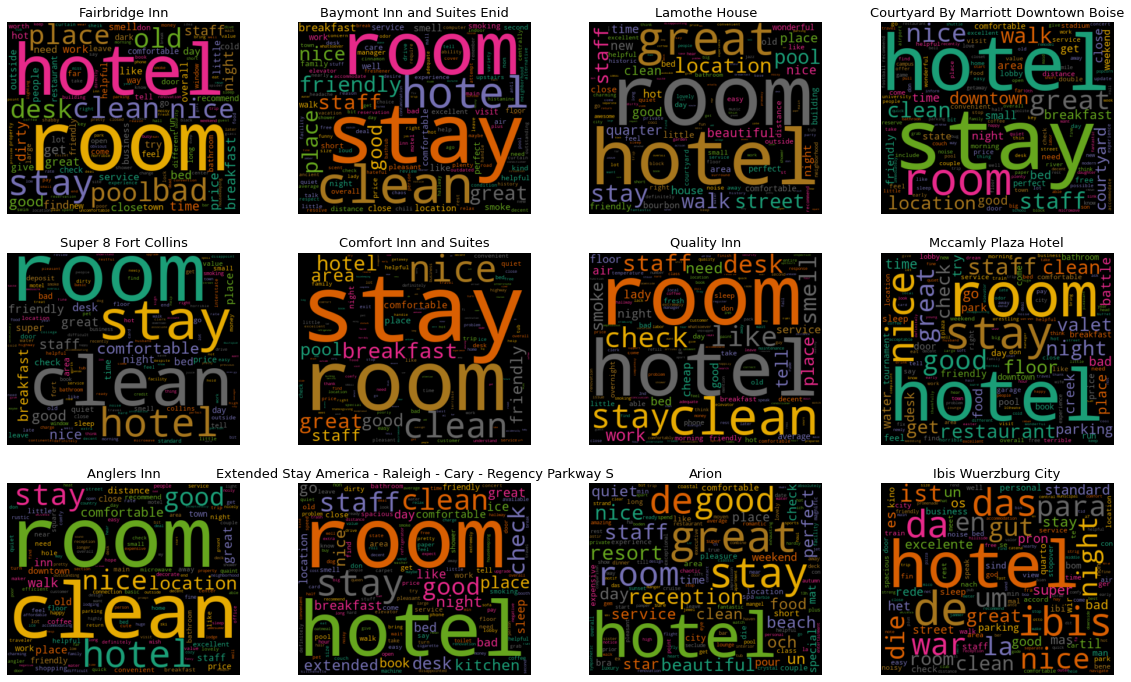

In [82]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

fig = plt.figure(figsize=(20, 12))
# setting values to rows and column variables
rows = 3
columns = 4
# Transposing document term matrix
df_dtm = reviews_dtm.sample(12, random_state=1).transpose()

# Plotting word cloud for each product
for indx, tok in enumerate(df_dtm.columns):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(df_dtm[tok].sort_values(ascending=False))
    
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, indx+1)
    
  # showing image
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title('\n'.join(wrap(tok,60)),fontsize=13)

plt.show()

In [111]:
import textblob
from textblob.sentiments import NaiveBayesAnalyzer

# just to avoid train the analyzer everytime
tb = textblob.Blobber(analyzer=NaiveBayesAnalyzer())

for index, row in reviews.iterrows():
    sent = tb(row['lemmatized']).sentiment
    reviews.loc[index, 'classification'] = sent[0]
    reviews.loc[index, 'p_pos'] = sent[1]
    reviews.loc[index, 'p_neg'] = sent[2]

In [116]:
reviews.classification.value_counts()

pos    15928
neg     5299
Name: classification, dtype: int64

In [128]:
reviews_sentiment = reviews[['name','p_pos', 'p_neg']].groupby(by='name').agg({
        'p_pos': ['mean'],
        'p_neg':['mean']
})

# rename aggregated columns names (It was multi index columns)
reviews_sentiment.columns = reviews_sentiment.columns.map('_'.join)
reviews_sentiment

,p_pos_mean,p_neg_mean
name,,
A Bed & Breakfast In Cambridge,0.638919,0.361081
Acorn Motor Inn,0.630880,0.369120
Ambassadors Inn and Suites,0.592055,0.407945
American Star Inn and Suites Atlantic City,0.579689,0.420311
Americas Best Value Inn,0.539331,0.460669
...,...,...
Vista Hotel On Lake Tarpon,0.676536,0.323464
Warwick Denver,0.721042,0.278958
Western Inn-glacier Park,0.694397,0.305603


In [129]:
reviews[['name', 'lemmatized', 'classification', 'p_pos', 'p_neg']]

,name,lemmatized,classification,p_pos,p_neg
0,Hotel Russo Palace,good location away pleasant min walk sea water...,pos,0.565548,0.434452
1,Hotel Russo Palace,great hotel bath lovely hotel stay floor bath ...,pos,0.559359,0.440641
2,Hotel Russo Palace,l ge bra rum,pos,0.808824,0.191176
3,Hotel Russo Palace,good location stay night hotel staff welcome f...,pos,0.989256,0.010744
4,Hotel Russo Palace,stay night hotel staff welcome friendly helpfu...,pos,0.991969,0.008031
...,...,...,...,...,...
35736,Holiday Inn Express Hotel and Suites Meadowlan...,great experience great staff wonderful ill eve...,pos,0.845284,0.154716
35737,Holiday Inn Express Hotel and Suites Meadowlan...,great experience stay sat night attend jet s g...,pos,0.528289,0.471711
35738,Holiday Inn Express Hotel and Suites Meadowlan...,great experience great stay,pos,0.699314,0.300686
35739,Holiday Inn Express Hotel and Suites Meadowlan...,affordable accommodate great,neg,0.443809,0.556191


In [130]:
reviews_sentiment.to_pickle("../Storage/Data/reviews_agg_sentiment.pkl")
reviews[['name', 'lemmatized', 'classification', 'p_pos', 'p_neg']].to_pickle("../Storage/Data/preprocessed_reviews.pkl")
hotels.to_pickle("../Storage/Data/hotels.pkl")